### 比較2018年地震深度與規模的關係

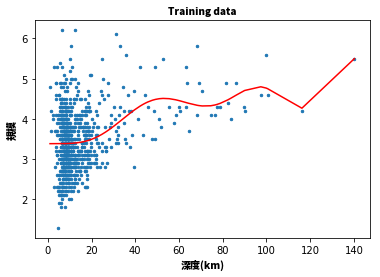

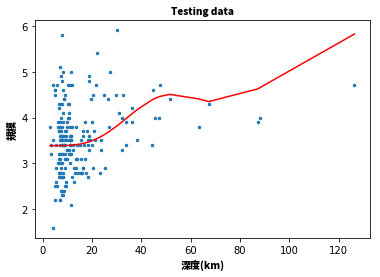

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
#mpl.rc('font', family='Noto Sans CJK TC')  # 設定patplotlib可顯示中文，這邊不可行，所以用下面那行
myf = FontProperties(fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc')

df = pd.read_csv('Q5-1Data/地震活動彙整_636898215882049551.csv',encoding='big5',header=1)  # 讀csv檔
x = np.array(df['深度'])  # input x 為深度
y = np.array(df['規模'])  # prediction y 為規模

X = x.reshape(len(x),1)  # 轉換為二維


x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)  #做test和train分割
X_tr = [[k[0]**i for i in range(1,11)] for k in x_train]
X_te = [[k[0]**i for i in range(1,11)] for k in x_test]

regr = LinearRegression()
regr.fit(X_tr, y_train)
Y_tr = regr.predict(X_tr)
Y_te = regr.predict(X_te)

train = list(zip(x_train.reshape(-1),Y_tr.reshape(-1)))
test = list(zip(x_test.reshape(-1),Y_te.reshape(-1)))
train.sort()
test.sort()

plt.figure(1)
plt.scatter(x_train, y_train, s=6);
plt.plot([k[0] for k in train],[k[1] for k in train], 'r')
plt.title('Training data',fontproperties=myf);
plt.xlabel('深度(km)',fontproperties=myf);
plt.ylabel('規模',fontproperties=myf);

plt.figure(2)
plt.scatter(x_test, y_test, s=6);
plt.plot([k[0] for k in test],[k[1] for k in test], 'r')
plt.title('Testing data',fontproperties=myf);
plt.xlabel('深度(km)',fontproperties=myf);
plt.ylabel('規模',fontproperties=myf);


